<a href="https://colab.research.google.com/github/raulc66/AI-Learning/blob/main/Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1 : Importing the libraries

In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Step 2 : Data Preprocessing

In [3]:
#importing the dataset
from tensorflow.keras.datasets import cifar10

In [4]:
# Loading the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [5]:
class_names = ['0 : airplane','1: automobile','2 : bird', '3 : cat', '4 : deer', '5 : dog', '6 : frog', '7 : horse', '8 : ship', '9 : truck']

In [6]:
print(class_names)

['0 : airplane', '1: automobile', '2 : bird', '3 : cat', '4 : deer', '5 : dog', '6 : frog', '7 : horse', '8 : ship', '9 : truck']


In [7]:
x_train.max(), x_train.min(), x_train.mean()

(255, 0, 120.70756512369792)

In [8]:
y_train.max(), y_train.min(), y_train.mean() # contains the 10 classes

(9, 0, 4.5)

In [9]:
class_names

['0 : airplane',
 '1: automobile',
 '2 : bird',
 '3 : cat',
 '4 : deer',
 '5 : dog',
 '6 : frog',
 '7 : horse',
 '8 : ship',
 '9 : truck']

In [10]:
# Normalizing the images
x_train = x_train / 255.0
x_test = x_test / 255.0

In [11]:
x_train.max(), x_train.min(), x_train.mean() # After normalization, processing the images is faster

(1.0, 0.0, 0.4733630004850874)

In [12]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

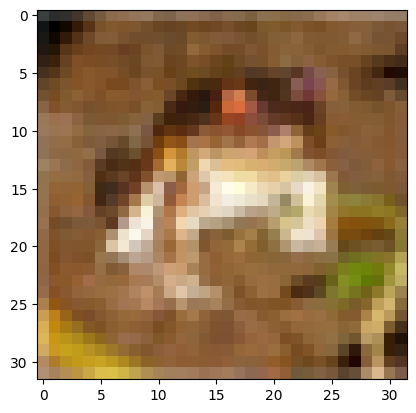

In [13]:
plt.imshow(x_train[0])

In [14]:
y_train[0] # the corresponding image location in y_train

array([6], dtype=uint8)

In [15]:
class_names  # frog -> 6th index

['0 : airplane',
 '1: automobile',
 '2 : bird',
 '3 : cat',
 '4 : deer',
 '5 : dog',
 '6 : frog',
 '7 : horse',
 '8 : ship',
 '9 : truck']

# Step 3 : Building the CNN

In [16]:
# Defining the object
model = tf.keras.models.Sequential()


In [17]:
# Adding first CCN layer

# 1) filters(kernel) = 32
# 2) kernel size = 3
# 3) padding = same  # valid padding does not take into account the columns of a non-square matrix
# 4) activation function = ReLu
# 5) input_shape = (32, 32, 3)

model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = [32, 32, 3]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Adding the second CNN layer and maxpool layer

# 1) filters(kernel) = 32
# 2) kernel size = 3
# 3) padding = same  # valid padding does not take into account the columns of a non-square matrix
# 4) activation function = ReLu
# 5) input_shape = (32, 32, 3)

model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))

# maxpool layer parameters
# 1) pool size = 2 # size of the square units from which the maximum value is going to be selected
# 2) strides = 2 # how many pixels the unit filter is moving
# padding = valid

model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding = 'valid'))

In [19]:
# Adding the third CNN layer

# 1) filters(kernel) = 64
# 2) kernel size = 3
# 3) padding = same  # valid padding does not take into account the columns of a non-square matrix
# 4) activation function = ReLu
# 5) input_shape = (32, 32, 3)

model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))


In [20]:
# Adding the fourth CNN layer and maxpool layer

# 1) filters(kernel) = 64
# 2) kernel size = 3
# 3) padding = same  # valid padding does not take into account the columns of a non-square matrix
# 4) activation function = ReLu
# 5) input_shape = (32, 32, 3)

model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))

# maxpool layer parameters
# 1) pool size = 2 # size of the square units from which the maximum value is going to be selected
# 2) strides = 2 # how many pixels the unit filter is moving
# padding = valid

model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding = 'valid'))

In [21]:
# Adding the droput layer

model.add(tf.keras.layers.Dropout(0.4)) # regularization technique


In [22]:
# Adding the flattening layer
model.add(tf.keras.layers.Flatten()) # converting the array into a vector

In [23]:
# Adding the first dense layer
model.add(tf.keras.layers.Dense(units = 128, activation ='relu'))

In [24]:
# Adding the second dense layer (output layer)

model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 591,274 (2.26 MB)

 Trainable params: 591,274 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

# Step 4 : Training the model

In [26]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['sparse_categorical_accuracy']) # for multiple outputs

In [27]:
model.fit(x_train,y_train, batch_size=10, epochs = 10)

Epoch 1/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - loss: 1.6628 - sparse_categorical_accuracy: 0.3835
Epoch 2/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 1.0478 - sparse_categorical_accuracy: 0.6297
Epoch 3/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.8870 - sparse_categorical_accuracy: 0.6861
Epoch 4/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.7934 - sparse_categorical_accuracy: 0.7212
Epoch 5/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.7168 - sparse_categorical_accuracy: 0.7496
Epoch 6/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.6566 - sparse_categorical_accuracy: 0.7661
Epoch 7/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.6200 - sparse_categorical_accuracy: 0.7804
Epoch 8/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.5731 - sparse_categorical_accuracy: 0.7967
Epoch 9/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.5506 - sparse_categorical_accuracy: 0.8042
Epoch 10/10
5000/5000 ━━━━━━

# Step 5 : Model evaluation and prediction


In [28]:
# evaluate the model performance
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.7552 - sparse_categorical_accuracy: 0.7443


In [29]:
print(f" Test accuracy is : {test_accuracy}") # it can changed by modifying the parameters/ trainig parameters

 Test accuracy is : 0.745199978351593


In [37]:
# Predictions
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [39]:
print (y_pred[0]) , print(y_test[0])

3
[3]


(None, None)

In [40]:
# Confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[741   9  44  60  27   5  12   5  69  28]
 [ 10 788   7  15   5   5   3   3  33 131]
 [ 44   3 612  92 114  57  40  18  12   8]
 [ 11   4  47 613  73 142  72  21   6  11]
 [  6   0  43  72 783  31  24  27  13   1]
 [  7   2  27 202  50 656  23  25   2   6]
 [  3   1  35  80  56  25 784   4  11   1]
 [  4   1  24  76  69  63   2 750   3   8]
 [ 49  19  13  27   6   2   7   4 854  19]
 [ 11  30   5  26   8   6   6   7  30 871]]


In [41]:
acc = accuracy_score(y_test, y_pred) # the accuracy is on the basis of the confusion_matrix
print(acc)

0.7452
